In [1]:
import numpy as np
import matplotlib.pyplot as plt

# step_function

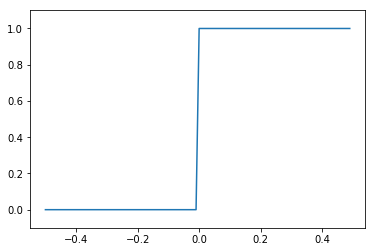

In [2]:
def step_function(x):
    return np.array(x>0, dtype=np.int)
#y = y.astype(np.int)

x = np.arange(-0.5, 0.5, 0.01)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# sigmoid function

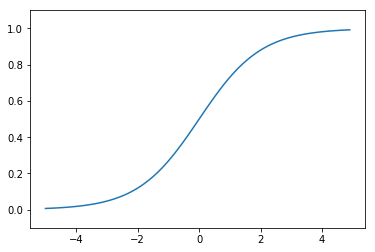

In [3]:
def sigmoid(x):
    res = 1 / (1.0 + np.exp(-x))
    return np.clip(res, 1e-8, 1-(1e-8))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# ReLU function

In [4]:
def relu(x):
    return np.maximun(0, x)
    # x less then 0, output 0; otherwise output x

# Muti-Dimension array

In [5]:
A = np.array([[1,3,4],[2,3,4],[1,2,3]])
B = np.array([[1,2],[3,4],[5,6]])
print('ndim(A):{}, ndim(B):{}'.format(np.ndim(A), np.ndim(B))) # ndim() to get the no. of dimension
print(A.shape, B.shape) # get the shape
np.dot(A,B)

ndim(A):2, ndim(B):2
(3, 3) (3, 2)


array([[30, 38],
       [31, 40],
       [22, 28]])

# NN array calculate1

In [6]:
def identity_function(x):
    return x

In [7]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print('First Layers:')
#print(A1)
print(Z1)

W2 = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print('Second Layers:')
#print(A2)
print(Z2)


W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = identity_function(A3)
print('Output:')
print(A3)

First Layers:
[ 0.57444252  0.66818777  0.75026011]
Second Layers:
[ 0.62624937  0.7710107 ]
Output:
[ 0.21682708  0.49627909]


# NN array calculate 

In [8]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[ 0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y   

In [9]:
network = init_network()
x = np.array([0.8, 0.9])
y = forward(network, x)
print(y)

[ 0.31825755  0.69945335]


# Softmax

In [10]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # prevent exp(a) too large
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([ 0.01821127,  0.24519181,  0.73659691])

# MNIST

In [11]:
from sklearn.datasets import fetch_mldata
from PIL import Image
mnist = fetch_mldata('MNIST original')

In [75]:
def _shuffle(x, y):
    # shuffle the order
    random = np.arange(x.shape[0])
    np.random.shuffle(random)
    return x[random], y[random]
    

def splid_valid_set(x, y, val_percen=0.2):
    who_size = x.shape[0]
    val_size = int(who_size * val_percen)
    x_all, y_all = _shuffle(x, y)
    
    x_train, y_train = x_all[0:val_size], y_all[0:val_size]
    x_valid, y_valid = x_all[val_size:], y_all[val_size:]
    return x_train, y_train, x_valid, y_valid

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
    
def get_onehot(y):
    length = np.unique(y).shape[0]
    OneHot = np.zeros((y.shape[0], length))
    OneHot[np.arange(y.shape[0]), y.astype(int)] = 1
    return OneHot

import pickle
def init_network():
    # pretrain weight in .pkl file (supplied by book)
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y   

    
#np.argwhere(Y_data==5.)    

In [76]:
X_data = mnist.data
Y_data = mnist.target
print(X_data.shape, Y_data.shape)

(70000, 784) (70000,)


In [83]:
Answer = get_onehot(Y_data) 
x_train, y_train, x_test, y_test = splid_valid_set(X_data, Y_data)

In [84]:
network = init_network()

In [92]:
accuracy_cnt = 0

batch_size = 100
accuracy_cnt = 0

for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_train[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / x_train.shape[0]))

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy:0.9248571428571428
